# EP03_Camera Sticker

## Step 01_Preparing sticker

- 스티커 다운로드 출처 : https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1
- 셀카 사진 업로드
- 사진 출처 : 본인 여자친구 (동의 완료)

In [1]:
# 필요한 모듈 import
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import math

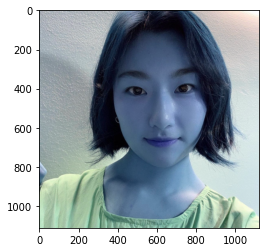

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/test.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

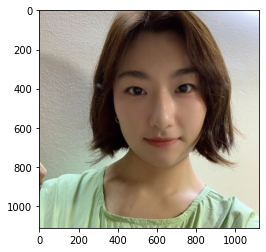

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

## Step 02_Detecting face & Land marking

In [4]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)

rectangles[[(356, 233) (911, 788)]]


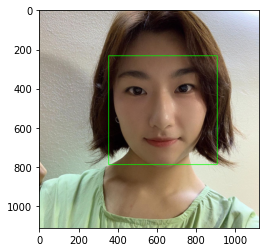

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


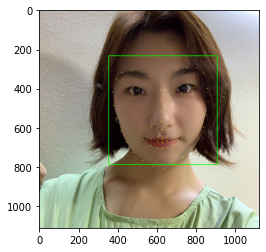

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # 68개의 이목구비 위치를 노란색으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 03_Checking for applying sticker

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(626, 568)
(x,y) : (626,290)
(w,h) : (556,556)


(556, 556, 3)


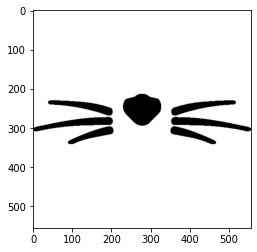

In [10]:
# 스티커 불러오기 & 리사이징
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
print (img_sticker.shape)

In [11]:
refined_x = x - w // 2
refined_y = y   
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (348,290)


## Step 04_Applying Sticker

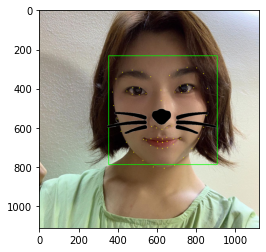

In [12]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

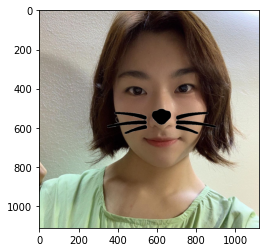

In [13]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 05_Find some errors.

 - 5-1) 얼굴 각도에 따른 스티커 적용성 체크
 - 5-2) 피사체가 먼 경우의 스티커 적용성 체크
 - 5-3) 옆으로 누워있는 피사체에 스티커 적용성 체크
 - 5-4) 실행속도에 관한 고찰
 - 5-5) 스티커 앱을 만들때 정확성에 관한 고찰

## Step 5-1) 얼굴 각도에 따른 스티커 적용성 체크

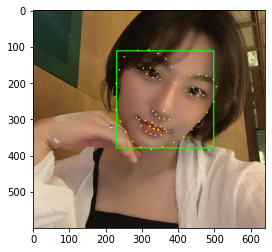

In [14]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/shake.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_bgr = cv2.resize(img_bgr, (640, 600))  # 640x600의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기


detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

degree:  -23.294563253894417
(348, 297)
(x, y): (214, 163)
(w, h): (269, 269)


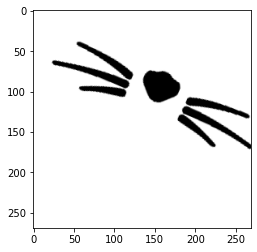

(x, y): (214, 163)


In [21]:
# 각도 계산
import math

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x_tilt = abs(landmark[42][0] - landmark[39][0])
    y_tilt = abs(landmark[42][1] - landmark[39][1])
    z_tilt = math.sqrt(x_tilt ** 2 + y_tilt ** 2)
    degree_tilt = -math.degrees(math.acos(x_tilt / z_tilt))
    
    print('degree: ', degree_tilt)

# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0] - dlib_rect.width() // 2
    y = landmark[33][1] - dlib_rect.width() // 2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x, y): (%d, %d)'%(x, y))
    print('(w, h): (%d, %d)'%(w, h))

# 스티커 이미지를 읽어와서 리사이징
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

tilt = cv2.getRotationMatrix2D((x, y), degree_tilt, 1)
tilt_sticker = cv2.warpAffine(img_sticker, tilt, (w, h), borderValue=(255,255,255))
tilt_sticker = cv2.resize(tilt_sticker, (w, h))

plt.imshow(tilt_sticker)
plt.show()

# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x 
refined_y = y 
print('(x, y): (%d, %d)'%(refined_x, refined_y))

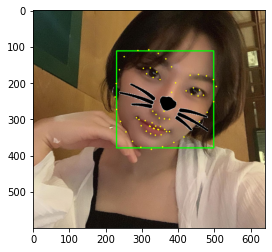

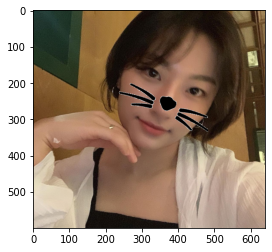

In [22]:
# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(tilt_sticker==255, sticker_area,tilt_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 결과 이미지 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(tilt_sticker==255, sticker_area,tilt_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5-2) 피사체가 먼 경우의 스티커 적용성 체크

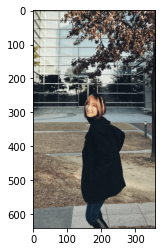

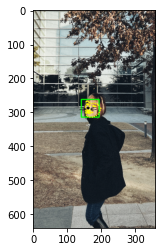

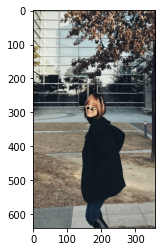

In [26]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/far2.jpeg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (360, 640))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# 이미지 위에 얼굴의 box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark 모델 불러오기
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지를 읽어와서 resize
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2
refined_y = y - w // 2

# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 결과 이미지 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5-3) 옆으로 누워있는 피사체에 스티커 적용성 체크

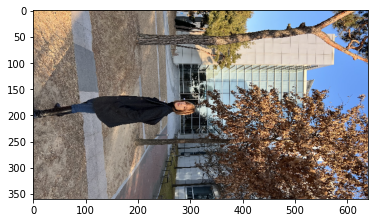

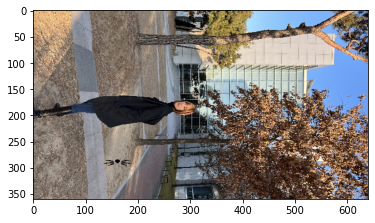

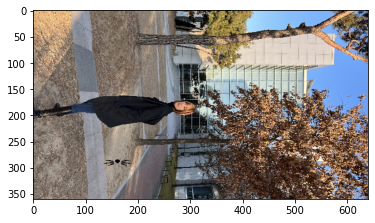

In [30]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/rotate.jpeg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# 이미지 위에 얼굴의 box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark 모델 불러오기
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지를 읽어와서 resize
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2
refined_y = y - w // 2

# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 결과 이미지 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 1차시도 실패
 - 피사체 아래쪽에 생긴 수염을 확인할 수 있다.
 - 피사체왜 맞는 사진으로 변경하여 재시도

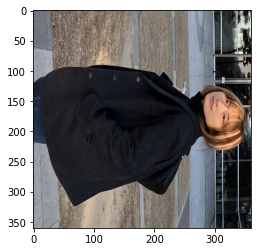

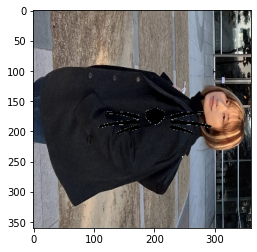

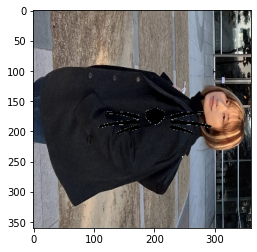

In [33]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/rotate2.jpeg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (360, 360))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# 이미지 위에 얼굴의 box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark 모델 불러오기
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지를 읽어와서 resize
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2
refined_y = y - w // 2

# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 결과 이미지 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 2차시도 또한 실패
 - 원인은 일정 각도 이상 기울어 질 시 얼굴 인식을 할 수 없음이 아닐까.

## Step 5-4) 실행속도에 관한 고찰

- 위 프로젝트는, 코드의 입력으로 이미지 input하여 스티커를 블랜한 이미지를 output 한다.

- 실제 스티커앱은 실시간으로 매 프레임마다 작업을 해 output 해줘야 하기 때문에, 다른 접근방법이 필요하다.

- openGL이나 directX등의 그래픽 라이브러리를 사용한다면 텍스쳐 수백개를 그려도 속도에는 별로 문제가 되지않을 것이다.

- 사람이 카메라를 들고 스티커 앱을 켜는 경우는 정면이니, 그 과정을 미리 알고리즘으로 구현 해 놓으면 기본 속도가 더 빨라 질 것이다.

## Step 5-5) 스티커 앱을 만들때 정확성에 관한 고찰

- 정확성또한 매우 중요할 필요성은 없어 보인다.
 - 이유 1) 카메라 스티커앱은 정밀한 사진을 촬영하기 위한 용도는 아니기 때문.
 - 이유 2) 사용자가 위와같이 각도를 90도 꺾어서 촬영하거나, 셀피를 힘들게 촬영하기 위해 손목을 꺾는 경우는 거의 없다.
 - 이유 3) 팔의 길이는 한정적이므로, 일정 길이 이상 넘어가는 시나리오에 대해서는 정확하게 구현 할 필요가 없다.